In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df_train = pd.read_csv(r'train_dataset.csv')
df_test = pd.read_csv(r'test_dataset.csv')

df_train.head(2)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678


In [79]:
df_test.head(2)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,12,0.75,4.08,NaN,1080,0,0.0,0,0,9.0,...,1,0,1,0,0,1,0,0,0,0
1,4,0.75,4.15,NaN,2400,0,0.0,0,0,20.0,...,0,1,0,0,0,0,1,0,0,0


# find all categorical columns with numerical type in df_train

In [80]:

numerical_categorical_columns = []
for col in df_train.columns:
    if df_train[col].dtype != 'object' and len(df_train[col].unique()) < 3:
        numerical_categorical_columns.append(col)
numerical_categorical_columns

['quarter_Quarter1',
 'quarter_Quarter2',
 'quarter_Quarter3',
 'quarter_Quarter4',
 'quarter_Quarter5',
 'department_finishing',
 'department_finishing ',
 'department_sweing',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

In [81]:
for col in numerical_categorical_columns:
    print(col, df_train[col].unique())

quarter_Quarter1 [1 0]
quarter_Quarter2 [0 1]
quarter_Quarter3 [0 1]
quarter_Quarter4 [0 1]
quarter_Quarter5 [0 1]
department_finishing [1 0]
department_finishing  [0 1]
department_sweing [0 1]
day_Monday [0 1]
day_Saturday [0 1]
day_Sunday [0 1]
day_Thursday [0 1]
day_Tuesday [0 1]
day_Wednesday [1 0]


In [82]:
df_train[numerical_categorical_columns].dtypes

quarter_Quarter1         int64
quarter_Quarter2         int64
quarter_Quarter3         int64
quarter_Quarter4         int64
quarter_Quarter5         int64
department_finishing     int64
department_finishing     int64
department_sweing        int64
day_Monday               int64
day_Saturday             int64
day_Sunday               int64
day_Thursday             int64
day_Tuesday              int64
day_Wednesday            int64
dtype: object

In [83]:
# column selection
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

# imports

In [84]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# all regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# all metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# overfit and underfit check    
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# decomposition
from sklearn.decomposition import PCA

# feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [85]:
impute = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()
features = SelectKBest(score_func=f_regression, k=10)
X = df_train.drop('actual_productivity', axis=1)
y = df_train['actual_productivity']

Ximp = impute.fit_transform(X)
Xsc = scaler.fit_transform(Ximp)
Xfeat = features.fit_transform(Xsc, y)
print(Xfeat.shape)
# display selected features names
X.columns[features.get_support()].tolist()

(1017, 10)


['team',
 'targeted_productivity',
 'smv',
 'wip',
 'idle_men',
 'no_of_style_change',
 'month',
 'quarter_Quarter4',
 'quarter_Quarter5',
 'department_finishing ']

# visualize correlation

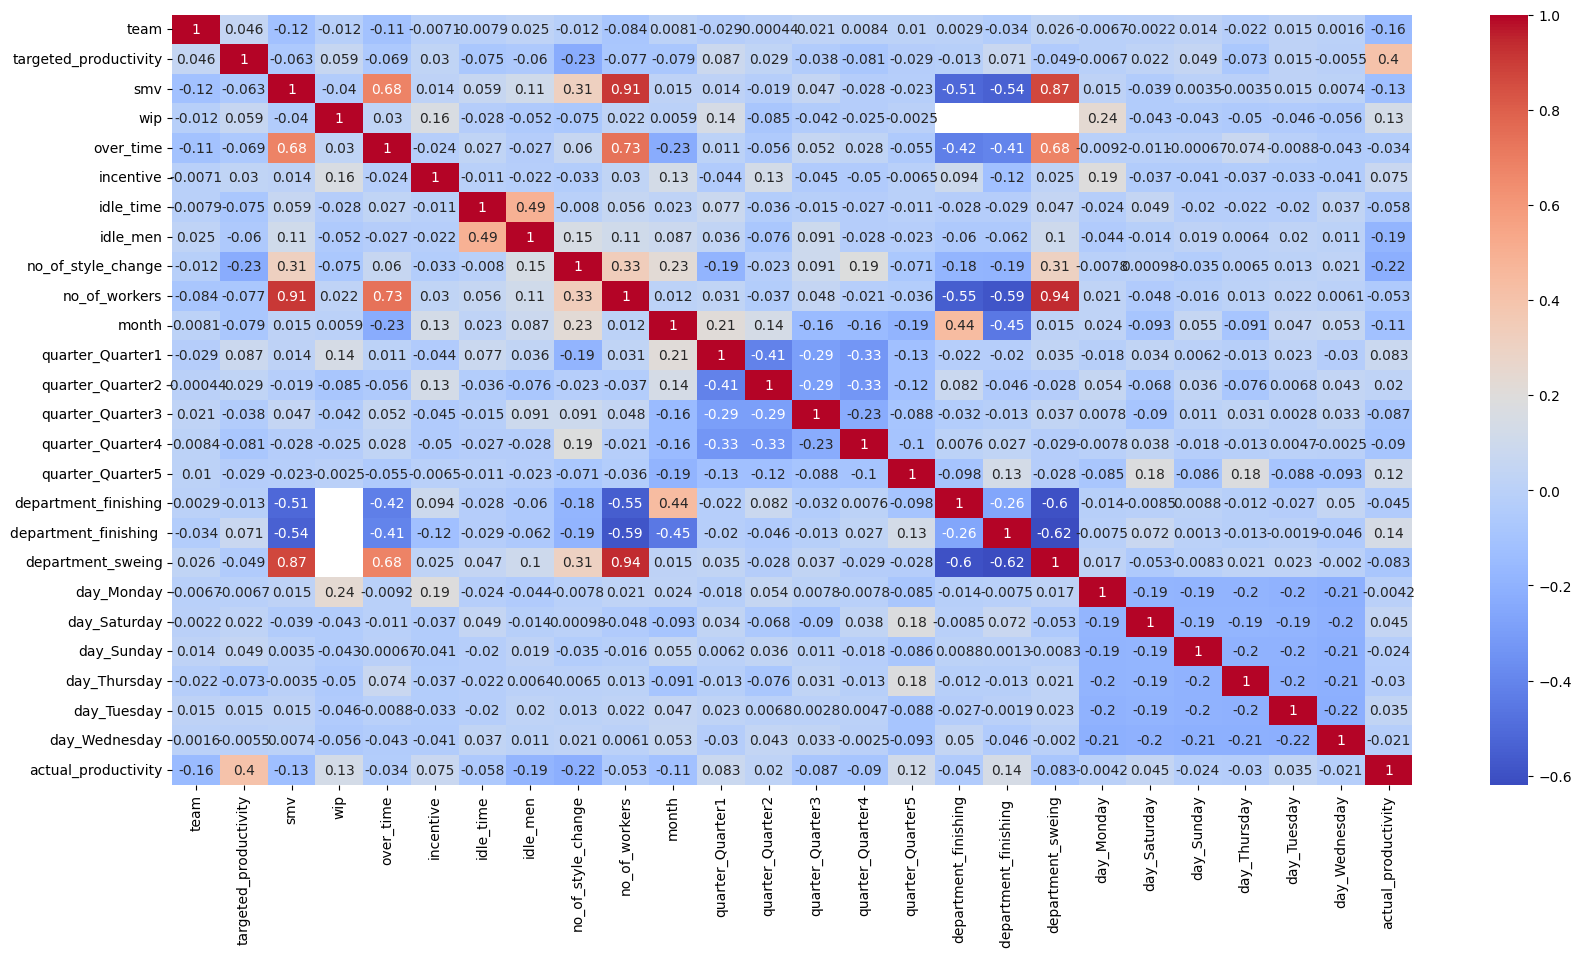

In [86]:
corr  = df_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# display list of correlated columns

In [87]:
import plotly.express as px
corr_cols = df_train.corrwith(df_train['actual_productivity'])
fig = px.bar(x=corr_cols.index, y=corr_cols.values)
fig.show()
# plot the distribution of target variable
fig = px.histogram(df_train, x='actual_productivity', nbins=100, title='Distribution of target variable')
fig.show()

# boxplot of target variable
fig = px.box(df_train, y='actual_productivity', title='Boxplot of target variable')
fig.show()

# remove outliers
outlier_threshold = 0.3507
df_train = df_train[df_train['actual_productivity'] < outlier_threshold]


# pipeline for each models

In [88]:
model1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('decomposition', PCA(n_components=3)),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

model2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
])

model3 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
])

model4 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('features', SelectKBest(score_func=f_regression)),
    ('model', ElasticNet())
])

model5 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('features', SelectKBest(score_func=f_regression)),
    ('model', DecisionTreeRegressor())
])

model6 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('features', SelectKBest(score_func=f_regression)),
    ('model', RandomForestRegressor())
])

model7 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('features', SelectKBest(score_func=f_regression)),
    ('model', GradientBoostingRegressor())
])

model8 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('features', SelectKBest(score_func=f_regression)),
    ('model', AdaBoostRegressor())
])

model9 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('features', SelectKBest(score_func=f_regression)),
    ('model', SVR())
])

model10 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('features', SelectKBest(score_func=f_regression)),
    ('model', KNeighborsRegressor())
])

models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]

In [89]:
models

[Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scaler', MinMaxScaler()),
                 ('decomposition', PCA(n_components=3)),
                 ('poly', PolynomialFeatures()), ('model', LinearRegression())]),
 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scaler', MinMaxScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge())]),
 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scaler', MinMaxScaler()), ('poly', PolynomialFeatures()),
                 ('model', Lasso())]),
 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scaler', MinMaxScaler()),
                 ('features',
                  SelectKBest(score_func=<function f_regression at 0x0000022E4FC86200>)),
                 ('model', ElasticNet())]),
 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scaler', MinMaxScaler()),
          

# fitting the models

In [90]:
y = df_train['actual_productivity']
X = df_train.drop('actual_productivity', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val = df_test.copy()


In [91]:
results = []
model_namses = ['Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'AdaBoost Regression', 'Support Vector Regression', 'KNeighbors Regression']
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'model': model,
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'name': model_namses[models.index(model)]
    })

# visualize

In [92]:
import plotly.express as px

In [93]:
pd.DataFrame(results)

,model,mse,mae,r2,name
0,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001214,0.030443,-0.027920,Polynomial Regression
1,"(SimpleImputer(strategy='median'), MinMaxScale...",0.002231,0.041524,-0.888329,Ridge Regression
2,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001220,0.031801,-0.032375,Lasso Regression
3,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001220,0.031801,-0.032375,ElasticNet Regression
4,"(SimpleImputer(strategy='median'), MinMaxScale...",0.002746,0.045968,-1.324445,Decision Tree Regression
5,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001122,0.029024,0.049904,Random Forest Regression
6,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001857,0.033109,-0.571935,Gradient Boosting Regression
7,"(SimpleImputer(strategy='median'), MinMaxScale...",0.000986,0.026275,0.165758,AdaBoost Regression
8,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001184,0.031801,-0.002082,Support Vector Regression
9,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001809,0.032464,-0.531119,KNeighbors Regression


In [94]:
df_results = pd.DataFrame(results)
df_results

,model,mse,mae,r2,name
0,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001214,0.030443,-0.027920,Polynomial Regression
1,"(SimpleImputer(strategy='median'), MinMaxScale...",0.002231,0.041524,-0.888329,Ridge Regression
2,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001220,0.031801,-0.032375,Lasso Regression
3,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001220,0.031801,-0.032375,ElasticNet Regression
4,"(SimpleImputer(strategy='median'), MinMaxScale...",0.002746,0.045968,-1.324445,Decision Tree Regression
5,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001122,0.029024,0.049904,Random Forest Regression
6,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001857,0.033109,-0.571935,Gradient Boosting Regression
7,"(SimpleImputer(strategy='median'), MinMaxScale...",0.000986,0.026275,0.165758,AdaBoost Regression
8,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001184,0.031801,-0.002082,Support Vector Regression
9,"(SimpleImputer(strategy='median'), MinMaxScale...",0.001809,0.032464,-0.531119,KNeighbors Regression


In [95]:
fig = px.bar(df_results, x='name', y='mse', color='name', log_y=True, title='MSE Scores of Regression Models')
# lower the mse, better the model
fig.add_annotation(xref='paper', yref='paper', x=0.5, y=0.9, text='Lower the MSE, better the model', showarrow=False)
fig.show()

In [96]:
fig = px.bar(df_results, x='name', y='mae', color='name', log_y=True, title='MAE Scores of Regression Models')
# lower the mae, better the model
fig.add_annotation(xref='paper', yref='paper', x=0.5, y=0.9, text='Lower the MAE, better the model', showarrow=False)
fig.show()

In [97]:
fig = px.bar(df_results, x='name', y='r2', color='name', title='R2 Scores of Regression Models')
# higher the r2, better the model
fig.add_annotation(xref='paper', yref='paper', x=0.5, y=0.9, text='Higher the R2, better the model', showarrow=False)
fig.show()
